In [8]:
#import dependencies
import requests
import json
from config1 import key
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import seaborn as sns

In [9]:
def news_api_data(user_input):
    '''takes an argument "user_input" as keywords to perform API calls to newsapi.org,
    returns a DataFrame with news data
    ''' 
   
    #in case we have several words as user's input, we can mark words or phrases that must appear with a + symbol
    user_input_list=user_input.split(" ")
    user_input_plus="".join(f'+{k}' for k in user_input_list)
    print(user_input_plus)

    url="https://newsapi.org/v2/everything"
    
    #specify parameters for sample, i.e results come from the particular news  resources
    sparams={
       'apiKey': key,
       'q': user_input_plus,
       'language': 'en',
       'pageSize': 100,
       'from': '2017-06-01',
       'sortBy': 'publishedAt',
       'sources': 'abc-news, associated-press, bbc-news, breitbart-news, cbc-news, cbs-news, cnn,  fox-news, daily-mail, independent, nbc-news, newsweek, new-york-magazine, reuters, time, the-globe-and-mail, the-telegraph, the-washington-times, usa-today'
    }
       
    #make API request and retrieve totalResults value 
    responses=requests.get(url, params=sparams)
    
    st_code=responses.status_code   
    if st_code!=200: 
        print(f'API problem, code {responses.status_code}')
    
    news_info=responses.json()
    sample_total=news_info['totalResults']
    
    #if response containes more than 10000 articles, retrive information for 10000.
    #Otherwise API returns an error 419 - too many requests 
    if sample_total>10000:
        sample_total=10000
    print(sample_total)
   
    #calculate the nuber of pages to iterate through (numer of all results is diveded by 100 (i.e. records per page))
    x=math.ceil(sample_total/100)
    print(f'the number of pages is {x}')
    
    #create DataFrame for retrieved results
    news_data=pd.DataFrame(columns=["published_at","name", "author", "description", "url","year_month"])
    index=0

    #iterate through each page and store  results in the DataFrame
    for page in range(1,x+1):
        sparams['page']=page
        responses=requests.get(url, params=sparams)    
        news_info=responses.json()
        print(f'processing page {page} of {x}')
        if 'articles' not in news_info:
            print(f'skipping page {page} of {x}')
            continue
        for article in news_info['articles']:
            news_data.loc[index,"published_at"]=article["publishedAt"]
            news_data.loc[index,"name"]=article["source"]["name"]
            news_data.loc[index,"author"]=article["author"]
            news_data.loc[index,"description"]=article["description"]
            news_data.loc[index,"url"]=article["url"]
            news_data.loc[index,"year_month"]=article["publishedAt"][:7]
            index+=1
    
    #clean the data from duplicate records 
    news_data.drop_duplicates(subset=['published_at','name','description'], keep='first', inplace=True)
    news_data.head(20)
    news_data.to_csv("report.csv")
    news_data.info()
    return news_data              

In [10]:
news_dat=news_api_data('hawaii')
news_dat.head(10)

+hawaii
9107
the number of pages is 92
processing page 1 of 92
processing page 2 of 92
processing page 3 of 92
processing page 4 of 92
processing page 5 of 92
processing page 6 of 92
processing page 7 of 92
processing page 8 of 92
processing page 9 of 92
processing page 10 of 92
processing page 11 of 92
processing page 12 of 92
processing page 13 of 92
processing page 14 of 92
processing page 15 of 92
processing page 16 of 92
processing page 17 of 92
processing page 18 of 92
processing page 19 of 92
processing page 20 of 92
processing page 21 of 92
processing page 22 of 92
processing page 23 of 92
processing page 24 of 92
processing page 25 of 92
processing page 26 of 92
processing page 27 of 92
processing page 28 of 92
processing page 29 of 92
processing page 30 of 92
processing page 31 of 92
processing page 32 of 92
processing page 33 of 92
processing page 34 of 92
processing page 35 of 92
processing page 36 of 92
processing page 37 of 92
processing page 38 of 92
processing page 39 o

,published_at,name,author,description,url,year_month
0,2018-06-29T23:22:30Z,Independent,"Jon Sharman, Jon Sharman",'It's a beautiful country' but 'the government...,https://www.independent.co.uk/news/world/europ...,2018-06
1,2018-06-29T19:16:43Z,Independent,"Chris Riotta, Chris Riotta",'What trouble did we cause? We just elected Tr...,https://www.independent.co.uk/news/world/ameri...,2018-06
2,2018-06-29T19:11:55Z,Reuters,David Brunnstrom,WASHINGTON (Reuters) - After nearly a year and...,https://www.reuters.com/article/us-usa-southko...,2018-06
3,2018-06-29T19:06:20Z,Daily Mail,http://www.dailymail.co.uk/home/search.html?s=...,"By David BrunnstromWASHINGTON, June 29 (Reuter...",http://www.dailymail.co.uk/wires/reuters/artic...,2018-06
4,2018-06-29T18:04:33Z,Reuters,Cheryl Platzman Weinstock,(Reuters Health) - National Guard soldiers may...,https://www.reuters.com/article/us-health-depl...,2018-06
5,2018-06-29T17:08:00Z,Independent,"Carol Schaeffer, Carol Schaeffer",'Fear is powerful',https://www.independent.co.uk/news/world/ameri...,2018-06
6,2018-06-29T17:07:11Z,Independent,"Chris Riotta, Chris Riotta",The state deploys state-of-the-art aircraft to...,https://www.independent.co.uk/news/world/ameri...,2018-06
7,2018-06-29T17:02:09Z,Newsweek,Kristin Hugo,Fishing gear is often responsible for both int...,http://www.newsweek.com/nearly-100-baby-hammer...,2018-06
8,2018-06-29T16:57:30Z,Independent,"Carol Schaeffer, Carol Schaeffer",President Trump reportedly tells aides 'We alw...,https://www.independent.co.uk/news/world/ameri...,2018-06
9,2018-06-29T16:46:00Z,Independent,"Staff Reporter, Staff Reporter",Prime minister urges families on site not to g...,https://www.independent.co.uk/news/world/asia/...,2018-06


In [11]:
def bar_news(news_data):
    '''takes a DataFrame as an argument, 
    creates a bar chart "Overal Quantity of Articles per News Source"
    ''' 
    #group data by News Sources names
    group_news=news_data.groupby("name")
    group_count=group_news['published_at'].count().rename("count")

    df_group_count=pd.DataFrame(group_count)
    df_group_count.sort_values(by=['count'], inplace=True, ascending=False)
    df_group_count.reset_index(inplace=True)
    df_group_count.head(20)
    
    #create a bar chart to show quantity of articles for each news source 
    group_name=df_group_count['name']
    y_pos=np.arange(len(df_group_count['count']))
    plt.figure(figsize=(10, 7))
    plt.barh(y_pos, df_group_count['count'], tick_label=group_name, alpha=0.6, color="green")
    plt.title("Overal Quantity of Articles per News Source")
    plt.xlabel("Number of Articles")
    plt.savefig("news_bar_chart.png", dpi=100)
    plt.show()
                

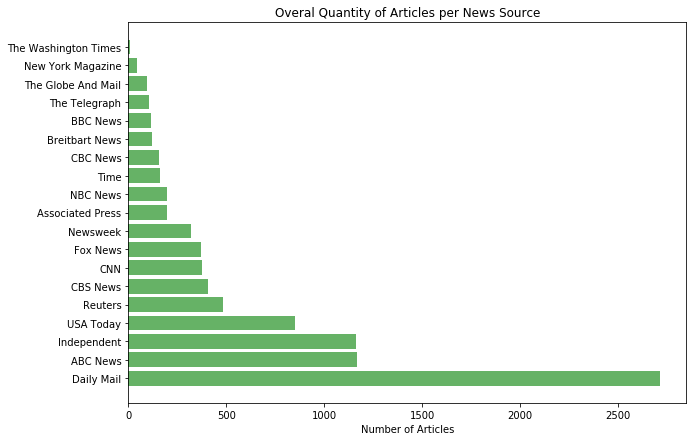

In [12]:
bar_news(news_dat)

In [13]:
def compound_score_data(news_data):
    '''takes a DataFrame as an argument and calculates compound scores for articles description,
    returns a new DataFrame
    '''
    news_data_new=news_data.loc[:,['year_month', 'name', 'description']]
    for index, row in news_data_new.iterrows():
        text=news_data_new.loc[index,"description"]
        if text:
            results = analyzer.polarity_scores(text)
            news_data_new.loc[index,"score"]=round(results["compound"],2)
        else:
            news_data_new.drop(index, inplace=True)
    return(news_data_new)

In [14]:
compound_df=compound_score_data(news_dat)
compound_df.head(10)

,year_month,name,description,score
0,2018-06,Independent,'It's a beautiful country' but 'the government...,0.35
1,2018-06,Independent,'What trouble did we cause? We just elected Tr...,-0.40
2,2018-06,Reuters,WASHINGTON (Reuters) - After nearly a year and...,0.60
3,2018-06,Daily Mail,"By David BrunnstromWASHINGTON, June 29 (Reuter...",0.42
4,2018-06,Reuters,(Reuters Health) - National Guard soldiers may...,-0.65
5,2018-06,Independent,'Fear is powerful',-0.10
6,2018-06,Independent,The state deploys state-of-the-art aircraft to...,-0.15
7,2018-06,Newsweek,Fishing gear is often responsible for both int...,0.32
8,2018-06,Independent,President Trump reportedly tells aides 'We alw...,0.00
9,2018-06,Independent,Prime minister urges families on site not to g...,0.44


In [15]:
def compound_scores_heat_map(news_data_new):
    '''takes a DataFrame with compound scores as an argument,
    creates a heatmap chart for average compound scores.
    Since some news sources didn't publish articles on particular months,
    using pd.pivot_table gives us a 2D Series where missing values are replaced with NaN.
    '''
    c_matrix = pd.pivot_table(news_data_new, "score", index=["name"], columns=["year_month"], aggfunc=np.mean)                          
    c_matrix=c_matrix.round(2)
    
    #create a heatmap chart of the average compound scores
    fig = plt.figure(figsize=(12,12))
    hm = sns.heatmap(c_matrix, cmap='RdYlGn', annot=True)
    hm.set_title("Heatmap of Avg. Compound Scores")
    plt.savefig("compound_scores_heat_map.png", dpi=100)
    plt.show()

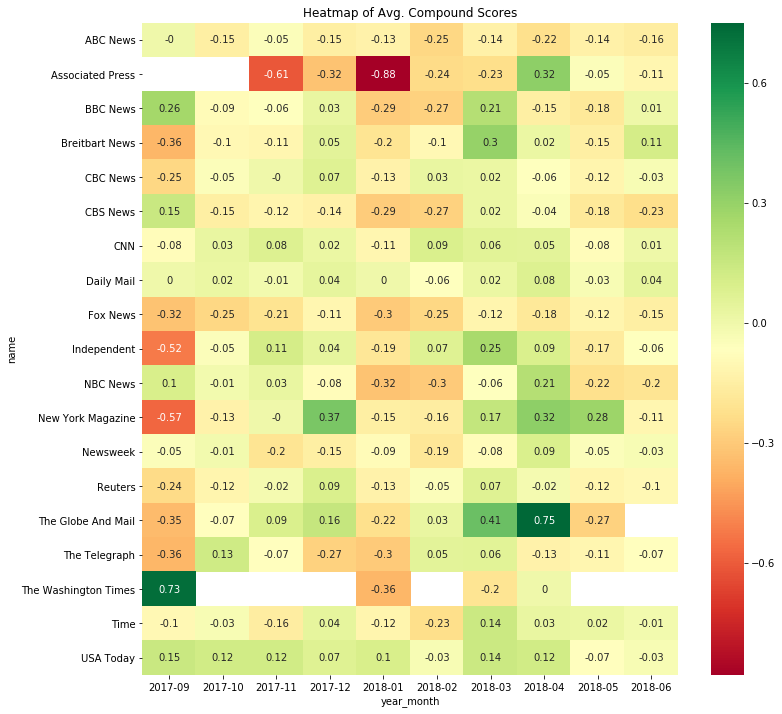

In [16]:
compound_scores_heat_map(compound_df)

In [17]:
def count_articles_heat_map(news_data): 
    '''takes a DataFrame as an argument,
    creates a heatmap chart "Number of Articles per Month"
    Since some news sources didn't publish articles on particular months,
    using pd.pivot_table gives us a 2D Series where missing values are replaced with NaN.
    '''
    d_matrix = pd.pivot_table(news_data, "url", index=["name"], columns=["year_month"], aggfunc='count')                          
    d_matrix.head(20)
    fig = plt.figure(figsize=(12,12))
    cm = sns.heatmap(d_matrix, cmap='YlGnBu', annot=True, fmt='g')
    cm.set_title("Number of Articles per Month")
    plt.savefig("count_values_heat_map.png", dpi=100)
    plt.show()

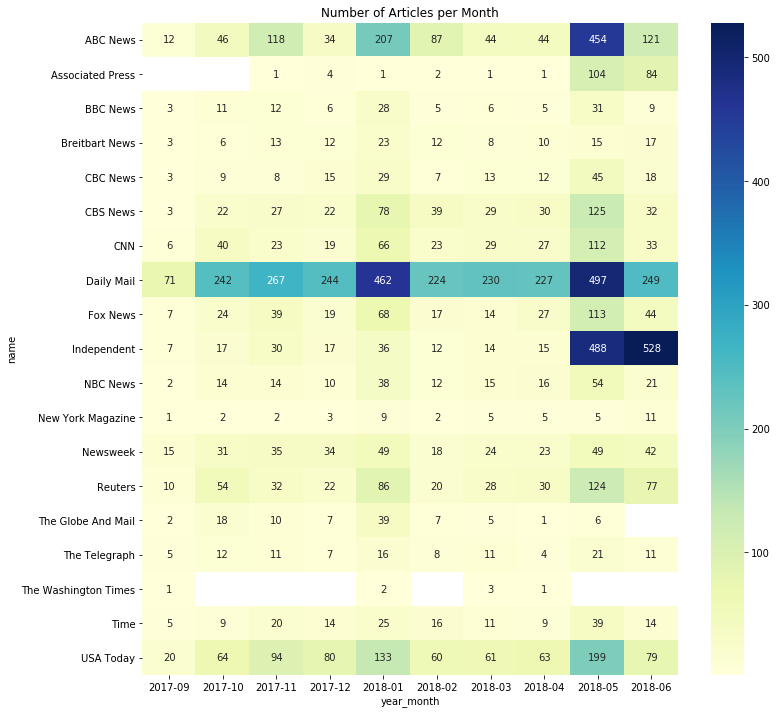

In [18]:
count_articles_heat_map(news_dat)